In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import time

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


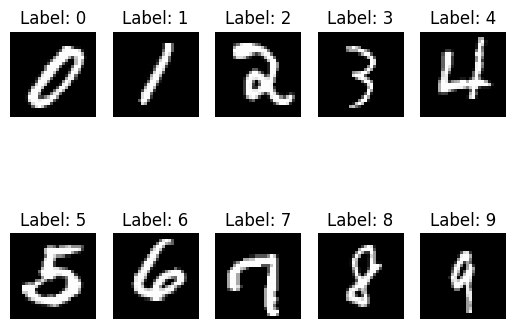

In [3]:
n=9
while n != -1:
    random_index = np.random.randint(0, len(x_train))
    if y_train[random_index] == n:
            n-=1
            sample_image = x_train[random_index]
            sample_label = y_train[random_index]
            ax=plt.subplot(2, 5, n + 2)
            sample_image[n]
            plt.imshow(sample_image, cmap='gray')
            plt.title(f"Label: {sample_label}")
            plt.axis('off')
        

In [4]:
train_data = x_train[:100]
train_labels = y_train[:100]
print(train_labels)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [5]:
train_data = train_data.reshape(train_data.shape[0], -1) / 255.0
print(train_data.shape)

(100, 784)


In [6]:
W1 = np.random.randn(784, 16)
b1 = np.zeros(16)
W2 = np.random.randn(16, 16)
b2 = np.zeros(16)
W3 = np.random.randn(16, 10)
b3 = np.zeros(10)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
a1 = sigmoid(np.dot(train_data, W1) + b1)
a2 = sigmoid(np.dot(a1, W2) + b2)
output = sigmoid(np.dot(a2, W3) + b3)

In [9]:
predicted_labels = np.argmax(output, axis=1)
accuracy = np.mean(predicted_labels == train_labels)
print(f"Accuracy: {accuracy}")
print(predicted_labels)
print(train_labels)

Accuracy: 0.11
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [10]:
learning_rate = 1
number_of_epochs = 20
batch_size = 10
epoch_costs = []

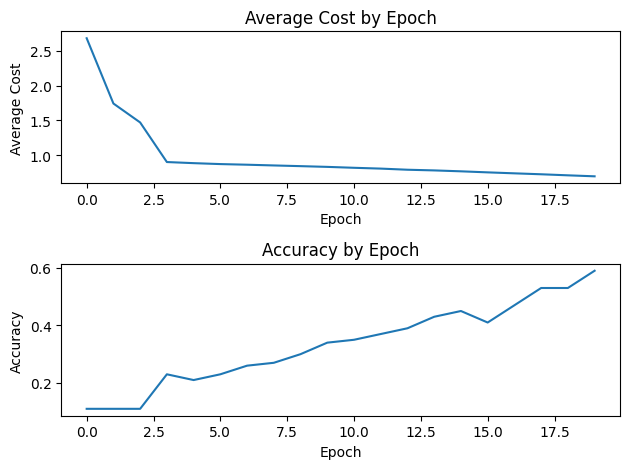

Execution time: 0.992807149887085 seconds


In [11]:
start_time = time.time()
accuracy_values0 = []

for epoch in range(number_of_epochs):
    # Shuffle the train set
    indices = np.random.permutation(len(train_data))
    train_data = train_data[indices]
    train_labels = train_labels[indices]

    epoch_cost = 0

    for batch_start in range(0, len(train_data), batch_size):
        # Allocate gradients
        grad_W1 = np.zeros_like(W1)
        grad_W2 = np.zeros_like(W2)
        grad_W3 = np.zeros_like(W3)
        grad_b1 = np.zeros_like(b1)
        grad_b2 = np.zeros_like(b2)
        grad_b3 = np.zeros_like(b3)

        batch_data = train_data[batch_start:batch_start+batch_size]
        batch_labels = train_labels[batch_start:batch_start+batch_size]

        for image, label in zip(batch_data, batch_labels):
            # Forward pass
            a1 = sigmoid(np.dot(image, W1) + b1)
            a2 = sigmoid(np.dot(a1, W2) + b2)
            output = sigmoid(np.dot(a2, W3) + b3)

            # Cost function (sum of squared errors)
            target = np.zeros(10)
            target[label] = 1

            error = output - target
            cost = np.sum(error ** 2)
            epoch_cost += cost

            # Backpropagation
            delta3 = error * output * (1 - output)

            delta2 = np.dot(delta3, W3.T) * a2 * (1 - a2)
            delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)

            grad_W3 += np.outer(a2, delta3)
            grad_W2 += np.outer(a1, delta2)
            grad_W1 += np.outer(image, delta1)

            grad_b3 += delta3
            grad_b2 += delta2
            grad_b1 += delta1

        # Update weights and biases
        W3 -= learning_rate * grad_W3 / batch_size
        W2 -= learning_rate * grad_W2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size

    epoch_costs.append(epoch_cost / len(train_data))

    # Calculate accuracy
    correct_predictions = 0

    for i in range(len(train_data)):
        image = train_data[i]
        label = train_labels[i]

        # Forward pass
        a1 = sigmoid(np.dot(image, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        output = sigmoid(np.dot(a2, W3) + b3)

        predicted_label = np.argmax(output)
        if predicted_label == label:
            correct_predictions += 1

    accuracy = correct_predictions / len(train_data)
    accuracy_values0.append(accuracy)

# Accuracy and cost graph
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(epoch_costs)
plt.title('Average Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')

plt.subplot(2, 1, 2)
plt.plot(accuracy_values0)
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

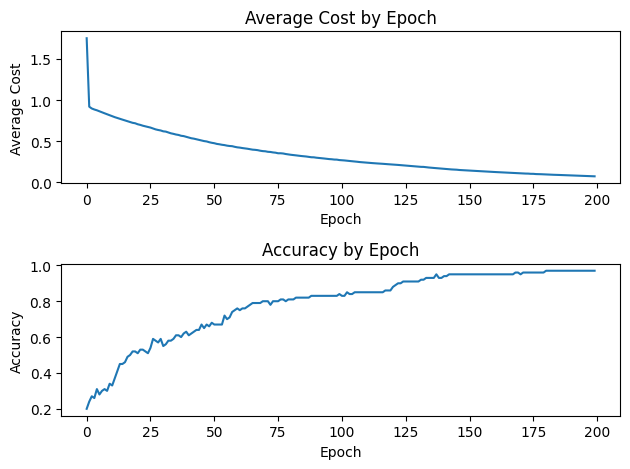

Execution time: 0.001993894577026367 seconds


In [12]:
W1 = np.random.randn(784, 16)
b1 = np.zeros(16)
W2 = np.random.randn(16, 16)
b2 = np.zeros(16)
W3 = np.random.randn(16, 10)
b3 = np.zeros(10)
number_of_epochs = 200
epoch_costs = []
accuracy_scores = []
accuracy_values1 = []
for epoch in range(number_of_epochs):
    # Shuffle the train set
    indices = np.random.permutation(len(train_data))
    train_data = train_data[indices]
    train_labels = train_labels[indices]
    start_time = time.time()
    epoch_cost = 0

    for batch_start in range(0, len(train_data), batch_size):
        batch_data = train_data[batch_start:batch_start+batch_size]
        batch_labels = train_labels[batch_start:batch_start+batch_size]

        # Forward pass
        a1 = sigmoid(np.dot(batch_data, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        output = sigmoid(np.dot(a2, W3) + b3)

        predictions = np.argmax(output, axis=1)
        accuracy = np.mean(predictions == batch_labels)
        accuracy_scores.append(accuracy)

        # Cost function (sum of squared errors)
        targets = np.eye(10)[batch_labels]

        error = output - targets
        cost = np.sum(error ** 2)
        epoch_cost += cost

        # Backpropagation
        delta3 = error * output * (1 - output)
        delta2 = np.dot(delta3, W3.T) * a2 * (1 - a2)
        delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)

        grad_W3 = np.dot(a2.T, delta3)
        grad_W2 = np.dot(a1.T, delta2)
        grad_W1 = np.dot(batch_data.T, delta1)

        grad_b3 = np.sum(delta3, axis=0)
        grad_b2 = np.sum(delta2, axis=0)
        grad_b1 = np.sum(delta1, axis=0)

        # Update weights and biases
        W3 -= learning_rate * grad_W3 / batch_size
        W2 -= learning_rate * grad_W2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size
    end_time = time.time()
    epoch_costs.append(epoch_cost / len(train_data))
    # Calculate accuracy
    correct_predictions = 0

    for i in range(len(train_data)):
        image = train_data[i]
        label = train_labels[i]

        # Forward pass
        a1 = sigmoid(np.dot(image, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        output = sigmoid(np.dot(a2, W3) + b3)

        predicted_label = np.argmax(output)
        if predicted_label == label:
            correct_predictions += 1

    accuracy = correct_predictions / len(train_data)
    accuracy_values1.append(accuracy)

    
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(epoch_costs)
plt.title('Average Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')

plt.subplot(2, 1, 2)
plt.plot(accuracy_values1)
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

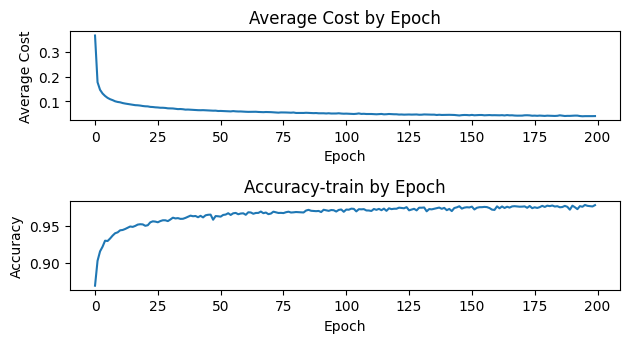

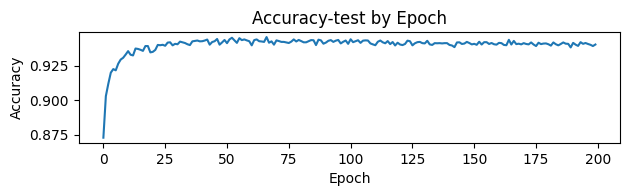

Execution time: 1957.3741147518158 seconds


In [13]:
W1 = np.random.randn(784, 16)
b1 = np.zeros(16)
W2 = np.random.randn(16, 16)
b2 = np.zeros(16)
W3 = np.random.randn(16, 10)
b3 = np.zeros(10)
number_of_epochs = 200
epoch_costs = []
accuracy_scores = []
start_time = time.time()
accuracy_values_total = []
train_data = x_train
train_labels = y_train
train_data = train_data.reshape(train_data.shape[0], -1) / 255.0 

accuracy_values_totalt = []
test_data = x_test
test_labels = y_test
test_data = test_data.reshape(test_data.shape[0], -1) / 255.0 

for epoch in range(number_of_epochs):
    # Shuffle the train set
    indices = np.random.permutation(len(train_data))
    train_data = train_data[indices]
    train_labels = train_labels[indices]

    epoch_cost = 0

    for batch_start in range(0, len(train_data), batch_size):
        batch_data = train_data[batch_start:batch_start+batch_size]
        batch_labels = train_labels[batch_start:batch_start+batch_size]

        # Forward pass
        a1 = sigmoid(np.dot(batch_data, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        output = sigmoid(np.dot(a2, W3) + b3)

        #predictions = np.argmax(output, axis=1)
        #accuracy = np.mean(predictions == batch_labels)
        #accuracy_scores.append(accuracy)

        # Cost function (sum of squared errors)
        targets = np.eye(10)[batch_labels]

        error = output - targets
        cost = np.sum(error ** 2)
        epoch_cost += cost

        # Backpropagation
        delta3 = error * output * (1 - output)
        delta2 = np.dot(delta3, W3.T) * a2 * (1 - a2)
        delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)

        grad_W3 = np.dot(a2.T, delta3)
        grad_W2 = np.dot(a1.T, delta2)
        grad_W1 = np.dot(batch_data.T, delta1)

        grad_b3 = np.sum(delta3, axis=0)
        grad_b2 = np.sum(delta2, axis=0)
        grad_b1 = np.sum(delta1, axis=0)

        # Update weights and biases
        W3 -= learning_rate * grad_W3 / batch_size
        W2 -= learning_rate * grad_W2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b3 -= learning_rate * grad_b3 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size

    epoch_costs.append(epoch_cost / len(train_data))
    correct_predictions = 0
    for i in range(len(train_data)):
        image = train_data[i]
        label = train_labels[i]

        # Forward pass
        a1 = sigmoid(np.dot(image, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        output = sigmoid(np.dot(a2, W3) + b3)

        predicted_label = np.argmax(output)
        if predicted_label == label:
            correct_predictions += 1

    accuracytotal = correct_predictions / len(train_data)
    accuracy_values_total.append(accuracytotal)

    correct_predictionst = 0
    for i in range(len(test_data)):
        image = test_data[i]
        label = test_labels[i]

        # Forward pass
        a1 = sigmoid(np.dot(image, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        outputt = sigmoid(np.dot(a2, W3) + b3)

        predicted_labelt = np.argmax(outputt)
        if predicted_labelt == label:
            correct_predictionst += 1

    accuracytotalt = correct_predictionst / len(test_data)
    accuracy_values_totalt.append(accuracytotalt)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(epoch_costs)
plt.title('Average Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')

plt.subplot(3, 1, 2)
plt.plot(accuracy_values_total)
plt.title('Accuracy-train by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

plt.subplot(3, 1, 3)
plt.plot(accuracy_values_totalt)
plt.title('Accuracy-test by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

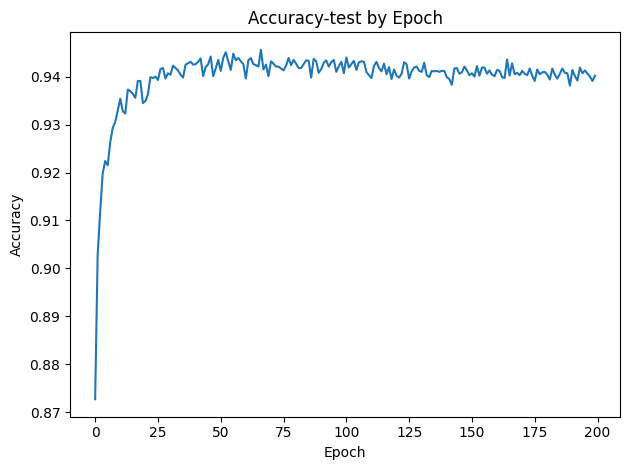

In [14]:
plt.plot(accuracy_values_totalt)
plt.title('Accuracy-test by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

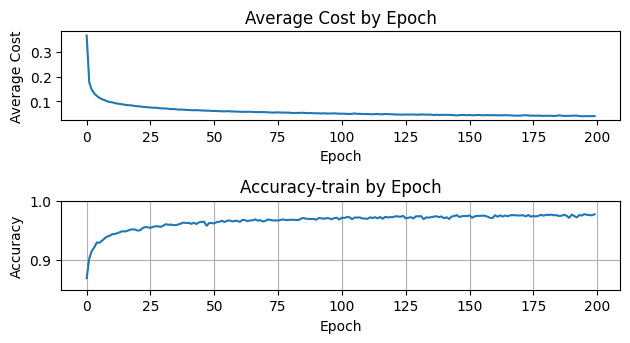

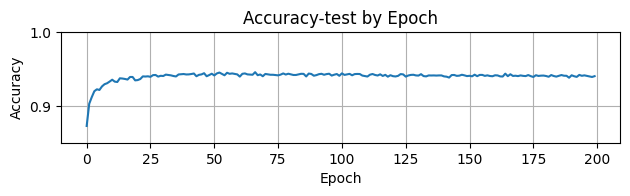

In [15]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(epoch_costs)
plt.title('Average Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Cost')

plt.subplot(3, 1, 2)
plt.grid() 
plt.plot(accuracy_values_total)
plt.title('Accuracy-train by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1) 
plt.tight_layout()
plt.show()

plt.subplot(3, 1, 3)
plt.grid()
plt.plot(accuracy_values_totalt)
plt.title('Accuracy-test by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1)  
plt.tight_layout()
plt.show()